In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv('Wholesale customers data (1).csv')

In [4]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
data.sample(20)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
338,1,2,3,333,7021,15601,15,550
48,2,3,11519,6152,10868,584,5121,1476
210,1,1,18567,1895,1393,1801,244,2100
192,1,3,5509,1461,2251,547,187,409
68,1,3,2446,7260,3993,5870,788,3095
161,1,3,12434,540,283,1092,3,2233
168,1,3,5809,735,803,1393,79,429
422,1,3,26400,1377,4172,830,948,1218
62,2,3,7823,6245,6544,4154,4074,964
101,2,3,1420,10810,16267,1593,6766,1838


In [9]:
labels=data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=0)

In [10]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [11]:
score = regressor.score(X_test,y_test)
display(np.round(score, 6))

C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.822485

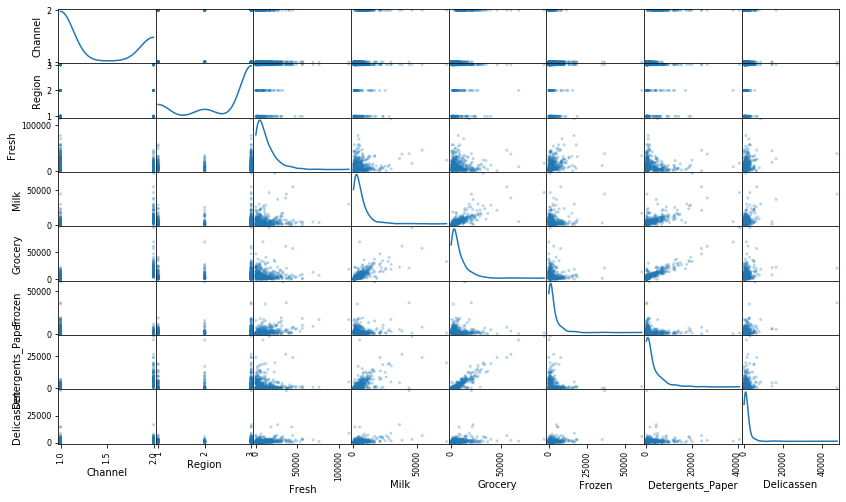

In [12]:
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

No handles with labels found to put in legend.


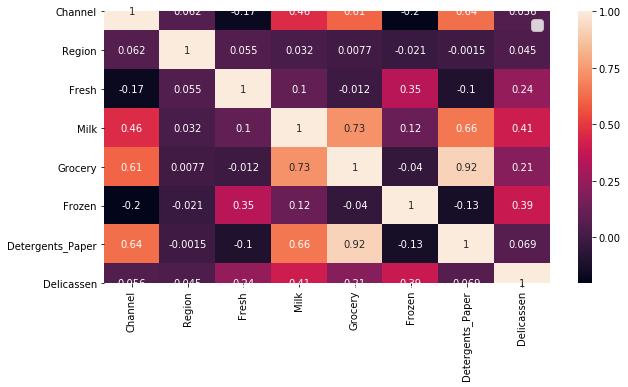

In [22]:
corr = data.corr()

plt.figure(figsize = (10,5))
ax = sns.heatmap(corr, annot=True)
ax.legend(loc=0, prop={'size': 15})

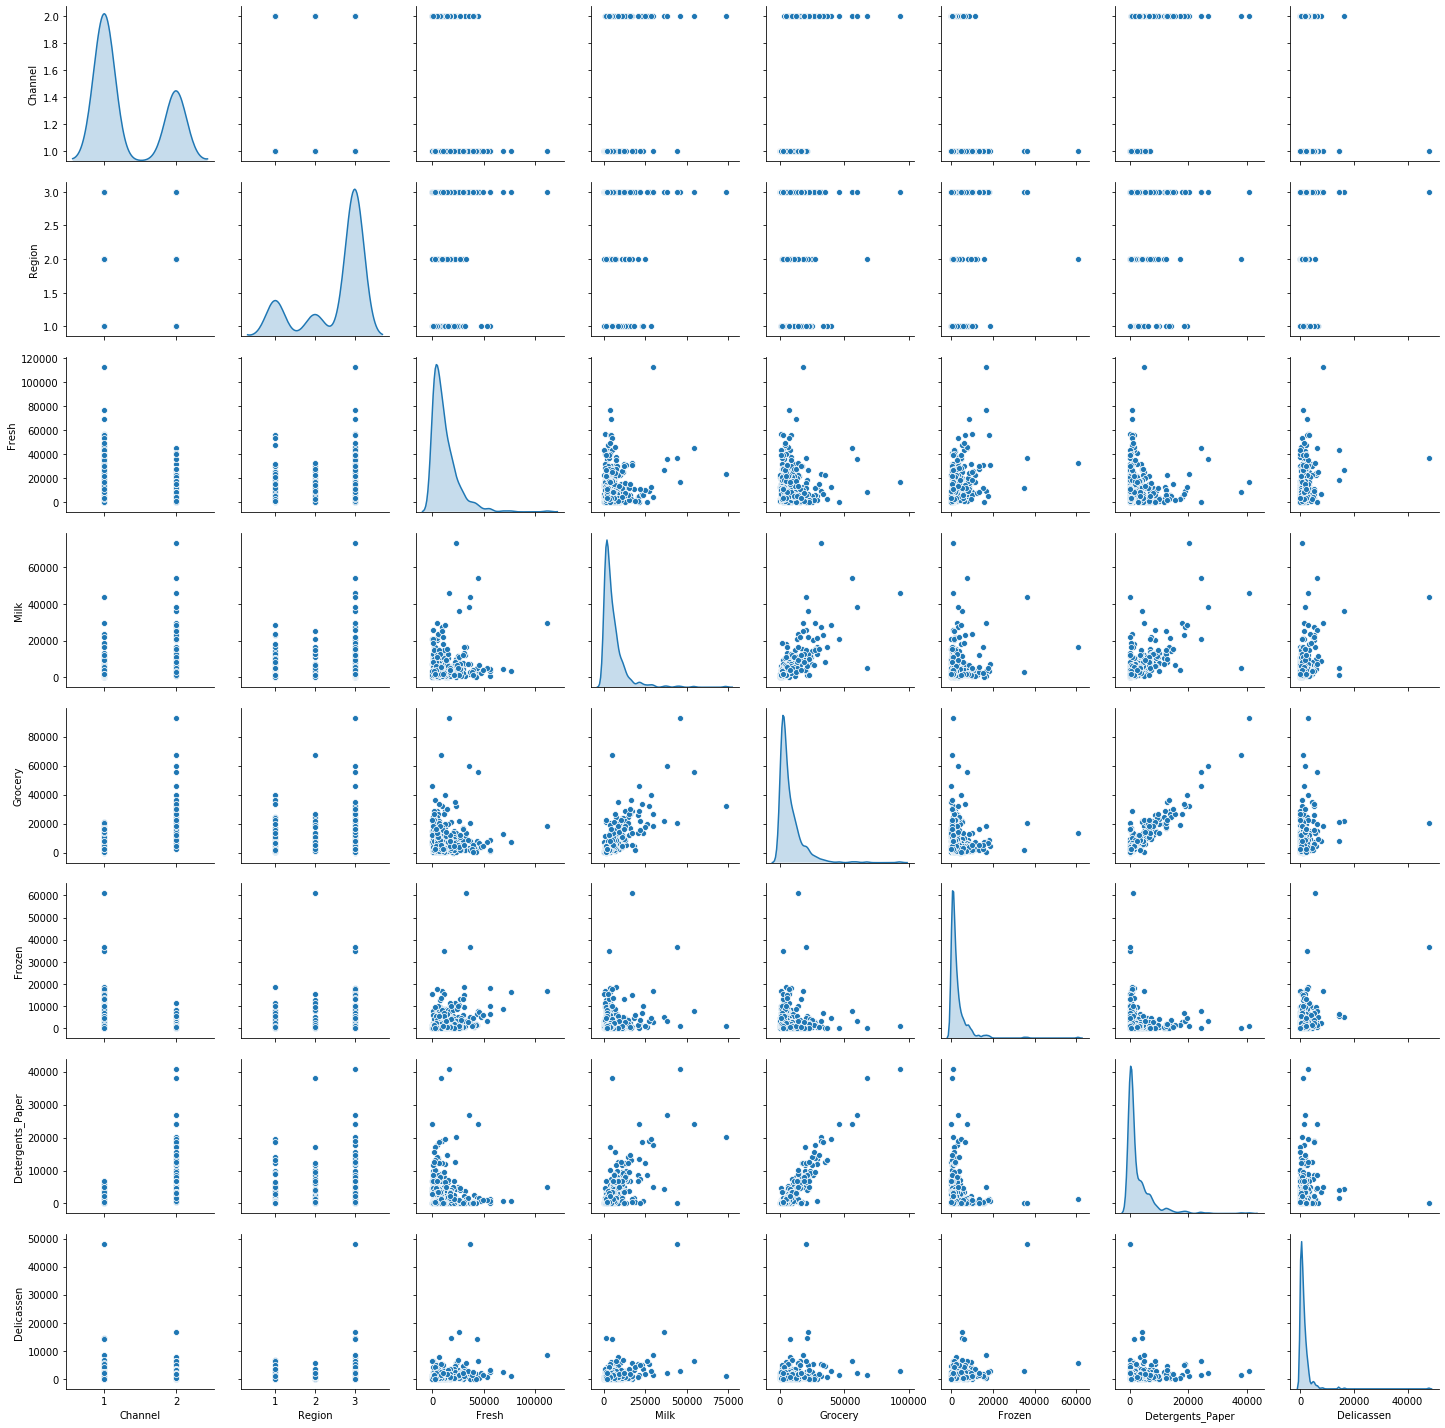

In [23]:
sns.pairplot(data, diag_kind = 'kde')

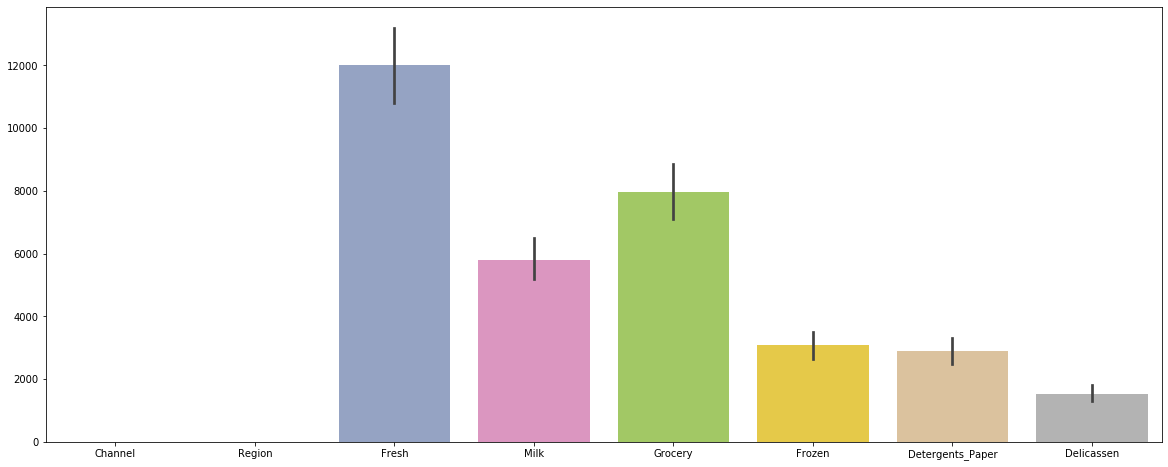

In [24]:
plt.figure(figsize = (20,8))
_ = sns.barplot(data=data, palette="Set2")

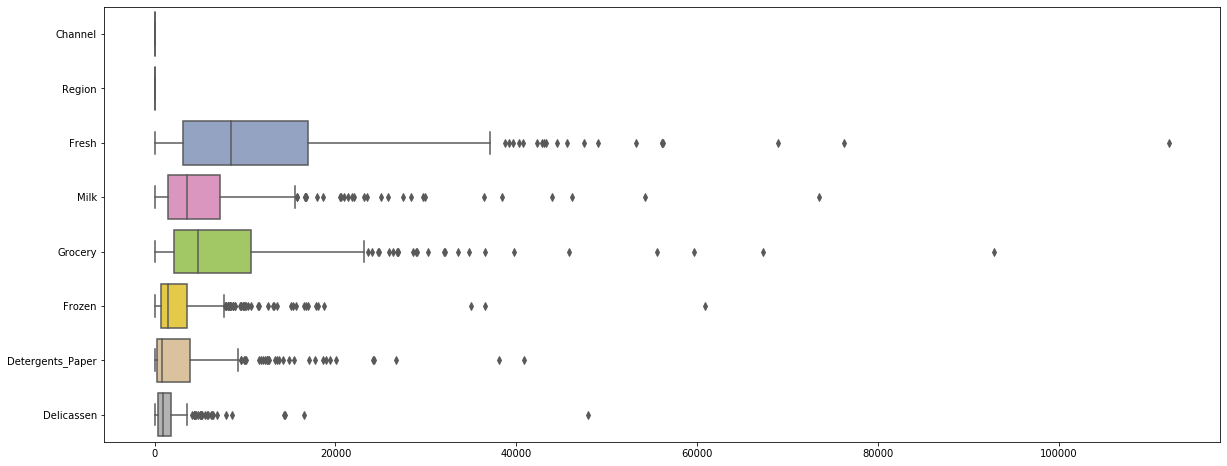

In [25]:
plt.figure(figsize = (20,8))
_ = sns.boxplot(data=data, orient='h', palette="Set2")

In [28]:
log_data = np.log(data)

In [29]:
(log_data)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.693147,1.098612,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,0.693147,1.098612,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,0.693147,1.098612,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,0.000000,1.098612,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,0.693147,1.098612,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...,...,...
435,0.000000,1.098612,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
436,0.000000,1.098612,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
437,0.693147,1.098612,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
438,0.000000,1.098612,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527
